In [16]:
import gymnasium as gym
import highway_env
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import imageio
import time

env_name = "merge-v0"

config = {
    "observation": {"type": "Kinematics"},
    "action": {"type": "DiscreteMetaAction"},  # default
    "lanes_count": 1,
    "vehicles_count": 12,
    "duration": 40,
    "simulation_frequency": 15,
    "policy_frequency": 5,
    "screen_width": 600,
    "screen_height": 300,
    "centering_position": [0.3, 0.5],
    "scaling": 5.5,
    "normalize_reward": True,
}

def make_env_discrete():
    env = gym.make(env_name, render_mode=None)
    env.unwrapped.configure(config)
    return env

vec_env = make_vec_env(make_env_discrete, n_envs=1)

viz_env = gym.make(env_name, render_mode="rgb_array", disable_env_checker=True)
viz_env.unwrapped.configure(config)

In [17]:
model = DQN(
    "MlpPolicy",
    vec_env,
    verbose=1,
    tensorboard_log="./tb_log_merge_dqn/"
)

Using cuda device


In [19]:
def visualize_policy(model, env, steps=100):
    obs, _ = env.reset()
    for _ in range(steps):
        action, _ = model.predict(obs, deterministic=True)
        obs, _, terminated, truncated, _ = env.step(action)
        frame = env.render()
        plt.imshow(frame)
        plt.axis("off")
        clear_output(wait=True)
        display(plt.gcf())
        plt.close()
        time.sleep(0.05)
        if terminated or truncated:
            break

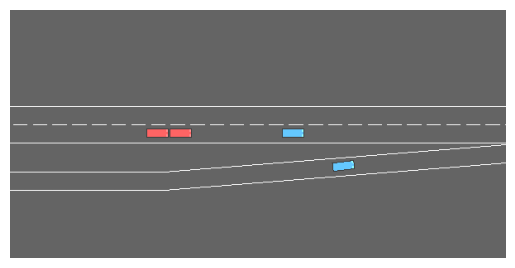

In [20]:
total_timesteps = 100_000
log_interval = 10_000
timesteps_run = 0

while timesteps_run < total_timesteps:
    print(f"\n--- Training from step {timesteps_run} to {timesteps_run + log_interval} ---")
    model.learn(total_timesteps=log_interval, reset_num_timesteps=False)
    timesteps_run += log_interval

    print(f"🎥 Visualizing policy at {timesteps_run} steps")
    visualize_policy(model, viz_env, steps=100)

model.save("td3_roundabout_task3")

crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashTrue
overFalse
✅ Total Reward in final evaluation: 34.23


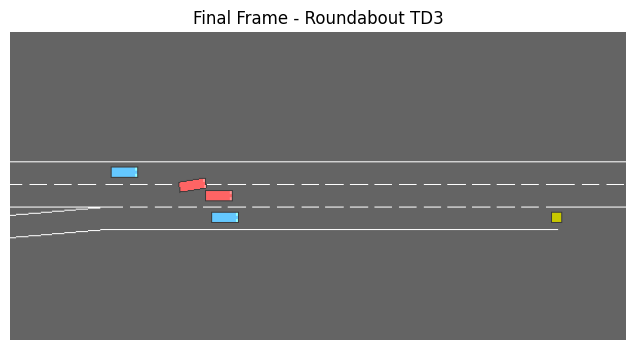

💾 Saved as: td3_roundabout_eval.gif


In [21]:
obs, _ = viz_env.reset()
done = False
frames = []
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, _ = viz_env.step(action)
    done = terminated or truncated
    total_reward += reward
    frames.append(viz_env.render())

print(f"✅ Total Reward in final evaluation: {total_reward:.2f}")

# Show final frame
plt.figure(figsize=(8, 4))
plt.imshow(frames[-1])
plt.axis("off")
plt.title("Final Frame - Roundabout TD3")
plt.show()

# Save video
imageio.mimsave("td3_roundabout_eval.gif", frames, fps=15)
print("💾 Saved as: td3_roundabout_eval.gif")


In [ ]:
mean_reward, std_reward = evaluate_policy(model, vec_env, n_eval_episodes=10)
print(f"📊 Mean Reward (10 eval episodes): {mean_reward:.2f} ± {std_reward:.2f}")


crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashTrue
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
overFalse
crashFalse
ove